<a href="https://colab.research.google.com/github/cierrakoen/class_4850-MachineLearning-Assignment3/blob/main/class_4850_MachineLearning_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assigment 3 - (400/450 points)

**Total points (400 undergraduate / 450 graduate)**

**Student Name: Cierra Koen**

**Undergraduate )**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 (for the folds use: 3456, 5678, 7890) for your randomseed/random states. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment3.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 20 extra credit points by doing one simple thing:

1) Make sure your repo for this assignment has a nice README file with figures and results. 


In [43]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Chess dataset from Kaggle: https://www.kaggle.com/datasets/datasnaek/chess

In [44]:
from google.colab import files
uploaded = files.upload()

Saving games.csv to games (3).csv


In [45]:
### Manually download it and upload to this istance data sample space
### Note DO NOT change these operations or all your answers will be incorrect

### Let's do some transformations and extra features on this.
df=pd.read_csv('games.csv', encoding='utf-8')

# Difference between white rating and black rating - independent variable
df['rating_difference']=df['white_rating']-df['black_rating']

# White wins flag (1=win vs. 0=not-win) - dependent (target) variable
df['white_win']=df['winner'].apply(lambda x: 1 if x=='white' else 0)


For this assignment we will be using two columns as features only, and the white_win colum as the label.

In [46]:
X=df[['rating_difference', 'turns']]
y=df['white_win'].values

# Question 1 (10 points)

Use sklearn to split this the data into testing and training data. 

In [47]:
##### Code block for Question 1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


# Question 2 (30 points)

Manually (DO NOT use kFold or any built-in functionality) create **THREE** different folds for the training data. 

In [48]:
##### Code block for Question 2
n_folds = 3
fold_size = len(X_train) // n_folds

fold1_X = X_train[:fold_size]
fold1_y = y_train[:fold_size]

fold2_X = X_train[fold_size:2*fold_size]
fold2_y = y_train[fold_size:2*fold_size]

fold3_X = X_train[2*fold_size:]
fold3_y = y_train[2*fold_size:]

# Question 3 (30 points)

Create code to build three different SVM models with the following kernels:

1.   linear
2.   poly
3.   rbf

In [49]:
##### Code block for Question 3
from sklearn import svm

# linear
def linear_svm(X_train,y_train):
  lin_svm = svm.SVC(kernel='linear')
  return lin_svm.fit(X_train, y_train)

#poly
def poly_svm(X_train,y_train):
  poly_svm = svm.SVC(kernel='poly', degree=3)
  return poly_svm.fit(X_train, y_train)

#rbf
def rbf_svm(X_train,y_train):
  rbf_svm = svm.SVC(kernel='rbf')
  return rbf_svm.fit(X_train, y_train)

# Question 4 (70 points)

FOLD 1 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

Linear Classification Report
              precision    recall  f1-score   support

           0       0.67      0.63      0.65      2059
           1       0.63      0.67      0.65      1953

    accuracy                           0.65      4012
   macro avg       0.65      0.65      0.65      4012
weighted avg       0.65      0.65      0.65      4012



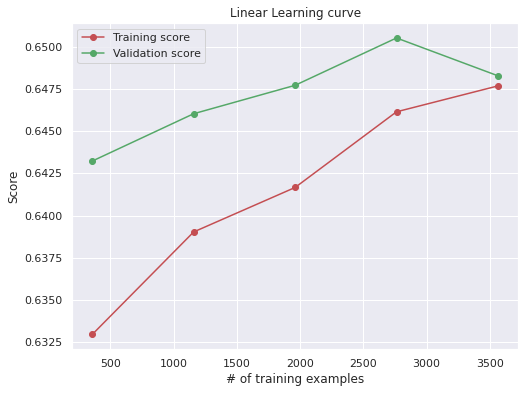

Polynomial Classification Report
              precision    recall  f1-score   support

           0       0.80      0.22      0.34      2059
           1       0.53      0.94      0.68      1953

    accuracy                           0.57      4012
   macro avg       0.67      0.58      0.51      4012
weighted avg       0.67      0.57      0.51      4012



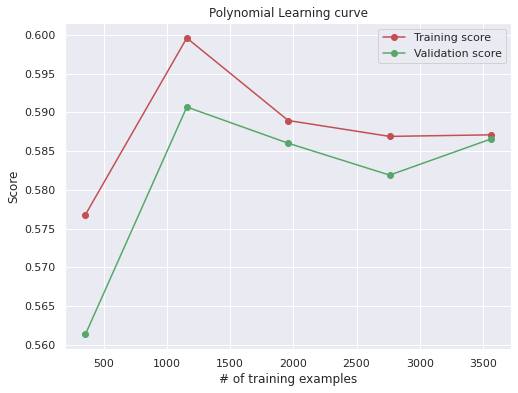

Radio Basis Function Classification Report
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      2059
           1       0.62      0.72      0.67      1953

    accuracy                           0.65      4012
   macro avg       0.65      0.65      0.65      4012
weighted avg       0.65      0.65      0.65      4012



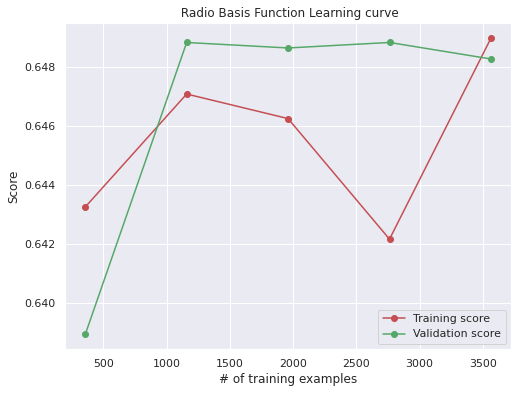

In [50]:
##### Code block for Question 4
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

#linear test
linear = linear_svm(fold1_X,fold1_y)
y_predict = linear.predict(X_test)

#classification report
print("Linear Classification Report")
print(classification_report(y_test, y_predict))

#learning curve data points
train_size_abs, train_scores, test_scores = learning_curve(linear, fold1_X, fold1_y,cv=3)

#creating mean and varience for linear test
train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

#plotting
plt.figure(figsize=(8, 6))
plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
plt.xlabel('# of training examples')
plt.ylabel('Score')
plt.title('Linear Learning curve')
plt.legend(loc='best')
plt.show()

### end of linear

# poly_svm
poly = poly_svm(fold1_X,fold1_y)
y_predict = poly.predict(X_test)

# classification report
print("Polynomial Classification Report")
print(classification_report(y_test, y_predict))

# learning curve data points
train_size_abs, train_scores, test_scores = learning_curve(poly, fold1_X, fold1_y,cv=3)

# creating mean and varience for linear test
train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

# creating plots
plt.figure(figsize=(8, 6))
plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
plt.xlabel('# of training examples')
plt.ylabel('Score')
plt.title('Polynomial Learning curve')
plt.legend(loc='best')
plt.show()

### end of poly

# RBF
rbf = rbf_svm(fold1_X, fold1_y)
y_predict = rbf.predict(X_test)

# classification report
print("Radio Basis Function Classification Report")
print(classification_report(y_test, y_predict))

# learning curve data points
train_size_abs, train_scores, test_scores = learning_curve(rbf, fold1_X, fold1_y,cv=3)

# creating mean and varience for rbf test
train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

# creating plots
plt.figure(figsize=(8, 6))
plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
plt.xlabel('# of training examples')
plt.ylabel('Score')
plt.title(' Radio Basis Function Learning curve')
plt.legend(loc='best')
plt.show()


Textual answer to question 4 goes here.



1. I noticed that in all kernels the training and validation scores usually end up near eachother once they both close in on the full number of training examples.
2. From the charts RBF is the only model in which the training and validation scores cross eachother in the long run and also has a higher validation score on the first fold.
3. The other models that arent RBF both have trend lines which run parallel to eachother. 



# Question 5 (70 points)

FOLD 2 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

In [ ]:
##### Code block for Question 5
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#linear test
linear = linear_svm(fold2_X,fold2_y)
y_predict = linear.predict(X_test)

#classification report
print("Linear Classification Report")
print(classification_report(y_test, y_predict))

#learning curve data points
train_size_abs, train_scores, test_scores = learning_curve(linear, fold2_X, fold2_y,cv=3)

#creating mean and varience for linear test
train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

#plotting
plt.figure(figsize=(8, 6))
plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
plt.xlabel('# of training examples')
plt.ylabel('Score')
plt.title('Linear Learning curve')
plt.legend(loc='best')
plt.show()

### end of linear

# poly_svm
poly = poly_svm(fold2_X,fold2_y)
y_predict = poly.predict(X_test)

# classification report
print("Polynomial Classification Report")
best_polynomial = classification_report(y_test, y_predict,output_dict=True)
best_poly_mse = mean_squared_error(y_test, y_predict)
print(classification_report(y_test, y_predict))

# learning curve data points
train_size_abs, train_scores, test_scores = learning_curve(poly, fold2_X, fold2_y,cv=3)

# creating mean and varience for linear test
train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

# creating plots
plt.figure(figsize=(8, 6))
plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
plt.xlabel('# of training examples')
plt.ylabel('Score')
plt.title('Polynomial Learning curve')
plt.legend(loc='best')
plt.show()

### end of poly

# RBF
rbf = rbf_svm(fold2_X, fold2_y)
y_predict = rbf.predict(X_test)

# classification report
print("Radio Basis Function Classification Report")
best_rbf = classification_report(y_test, y_predict,output_dict=True)
best_rbf_mse = mean_squared_error(y_test, y_predict)
print(classification_report(y_test, y_predict))

# learning curve data points
train_size_abs, train_scores, test_scores = learning_curve(rbf, fold2_X, fold2_y,cv=3)

# creating mean and varience for rbf test
train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

# creating plots
plt.figure(figsize=(8, 6))
plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
plt.xlabel('# of training examples')
plt.ylabel('Score')
plt.title(' Radio Basis Function Learning curve')
plt.legend(loc='best')
plt.show()

Textual answer to question 5 goes here.



1. When looking at fold 2, it is obvious that the testing and training set are very similar to one another because the lines have less space in between them.
2. Linear and Polynomial seem to evaluate the data better than RBF because the testing and validation scores are almost the same.
3. For fold 2, the polynomial model starts off seemingly evaluating the model with new data but then tanks once more data comes in rather than the other models which start out pretty low since there has not been much data given in the first 5000 samples. 



# Question 6 (70 points)

FOLD 3 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

In [ ]:
##### Code block for Question 6
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#linear test
linear = linear_svm(fold3_X,fold3_y)
y_predict = linear.predict(X_test)

#classification report
print("Linear Classification Report")
best_linear = classification_report(y_test, y_predict,output_dict=True)
best_lin_mse = mean_squared_error(y_test, y_predict)
print(classification_report(y_test, y_predict))

#learning curve data points
train_size_abs, train_scores, test_scores = learning_curve(linear, fold3_X, fold3_y,cv=3)

#creating mean and varience for linear test
train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

#plotting
plt.figure(figsize=(8, 6))
plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
plt.xlabel('# of training examples')
plt.ylabel('Score')
plt.title('Linear Learning curve')
plt.legend(loc='best')
plt.show()

### end of linear

# poly_svm
poly = poly_svm(fold3_X,fold3_y)
y_predict = poly.predict(X_test)

# classification report
print("Polynomial Classification Report")
print(classification_report(y_test, y_predict))

# learning curve data points
train_size_abs, train_scores, test_scores = learning_curve(poly, fold3_X, fold3_y,cv=3)

# creating mean and varience for linear test
train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

# creating plots
plt.figure(figsize=(8, 6))
plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
plt.xlabel('# of training examples')
plt.ylabel('Score')
plt.title('Polynomial Learning curve')
plt.legend(loc='best')
plt.show()

### end of poly

# RBF
rbf = rbf_svm(fold3_X, fold3_y)
y_predict = rbf.predict(X_test)

# classification report
print("Radio Basis Function Classification Report")
print(classification_report(y_test, y_predict))

# learning curve data points
train_size_abs, train_scores, test_scores = learning_curve(rbf, fold3_X, fold3_y,cv=3)

# creating mean and varience for rbf test
train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

# creating plots
plt.figure(figsize=(8, 6))
plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
plt.xlabel('# of training examples')
plt.ylabel('Score')
plt.title(' Radio Basis Function Learning curve')
plt.legend(loc='best')
plt.show()

Textual answer to question 6 goes here.

# Question 7 (30 points)

From the three folds pick the best model for each different type of kernel.

Present a table with the following columns from their metrics and model. Remember to make classifications on the test set at this stage.

1. Model Name (Kernel)
2. Accuracy
3. Precision
4. Recall
5. F1-score
6. RMSE


In [ ]:
##### Code block for Question 7\
import numpy as np

#linear metrics
lin_acc = best_linear['accuracy']
lin_pre = best_linear['macro avg']['precision']
lin_rec = best_linear['macro avg']['recall']
lin_f1 = best_linear['macro avg']['f1-score']
lin_rmse = np.sqrt(best_lin_mse)

#polynomial metrics
poly_acc = best_polynomial['accuracy']
poly_pre = best_polynomial['macro avg']['precision']
poly_rec = best_polynomial['macro avg']['recall']
poly_f1 = best_polynomial['macro avg']['f1-score']
poly_rmse = np.sqrt(best_poly_mse)

#rbf metrics
rbf_acc = best_rbf['accuracy']
rbf_pre = best_rbf['macro avg']['precision']
rbf_rec = best_rbf['macro avg']['recall']
rbf_f1 = best_rbf['macro avg']['f1-score']
rbf_rmse = np.sqrt(best_rbf_mse)
data = [["Model Name (Kernel)","Accuracy", "Precision", "Recall", "F1-score", "RMSE"],
        ["Linear", lin_acc, lin_pre, lin_rec, lin_f1, lin_rmse],
        ["Polynomial", poly_acc, poly_pre, poly_rec, poly_f1, poly_rmse],
        ["Radio Basis Function", rbf_acc, rbf_pre, rbf_rec, rbf_f1, rbf_rmse]
]

# create the figure and axis objects
fig, ax = plt.subplots()

# create the table
table = ax.table(cellText=data, colLabels=None, cellLoc='center', loc='center')

# set the font size of the table cells
table.auto_set_font_size(False)
table.set_fontsize(14)

# remove the borders from the table cells
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)

# set the title of the plot
ax.set_title('Best Model Metric')

# hide the axis ticks and labels
ax.axis('off')

# show the plot
plt.show()

# Question 8 (40 points) 

From question 7, which one is the best model in the following contexts:

a) Metrics from table from question 7, and why?

b) Based on the learning curves ploted in the previous questions, and why?

Textual answer to question 8a goes here.

The best model is because the overall f1-scores is higher

Textual answer to question 8b goes here.

Based on the graphs I would say that the polynomial model does better because of how the two scores usually converge and increase in learning the model overall.  

# Question 9 (50 points)

Wrie the simplest and most efficient Sklearn pipeline to do extactly what we did in questions 2 to 6. Make sure that you get all the same intermediate outputs and output the same table from quetsion 7 directly from this pipeline.

In [ ]:
##### Code block for Question 9
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import numpy as np

# define k-fold cross-validation with 3 folds
kf = KFold(n_splits=3, shuffle=True, random_state=1234)

# initialize best models
best_k_linear = 0
best_k_poly = 0
best_k_rbf = 0

# loop over each fold in the cross-validation
for train_idx, test_idx in kf.split(X):
    # split the data into training and test sets for this fold
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # train and evaluate the linear SVM
    lin_svm = svm.SVC(kernel='linear')
    linear = lin_svm.fit(X_train, y_train)
    y_pred_lin = linear.predict(X_test)
    print("Linear SVM Classification Report:\n", classification_report(y_test, y_pred_lin))

    #learning curve data points
    train_size_abs, train_scores, test_scores = learning_curve(linear, X_train, y_train,cv=3)

    #creating mean and varience for linear test
    train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

    #plotting
    plt.figure(figsize=(8, 6))
    plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
    plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
    plt.xlabel('# of training examples')
    plt.ylabel('Score')
    plt.title('Linear Learning curve')
    plt.legend(loc='best')
    plt.show()
    if lin_svm.score(X_test, y_test) > lin_svm.score(X_train, y_train):
        best_k_linear = classification_report(y_test, y_pred_lin)
        best_xy_lin = [X_train, y_train]
        best_lin_mse = mean_squared_error(y_test, y_pred_lin)
    
    # train and evaluate the polynomial SVM
    poly_svm = svm.SVC(kernel='poly')
    polynomial = poly_svm.fit(X_train, y_train)
    y_pred_poly = polynomial.predict(X_test)
    print("Polynomial SVM Classification Report:\n", classification_report(y_test, y_pred_poly))

    #learning curve data points
    train_size_abs, train_scores, test_scores = learning_curve(polynomial, X_train, y_train,cv=3)

    #creating mean and varience for polynomial test
    train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

    #plotting
    plt.figure(figsize=(8, 6))
    plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
    plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
    plt.xlabel('# of training examples')
    plt.ylabel('Score')
    plt.title('Polynomial Learning curve')
    plt.legend(loc='best')
    plt.show()
    
    if poly_svm.score(X_test, y_test) > poly_svm.score(X_train, y_train):
        best_k_poly = classification_report(y_test, y_pred_poly)
        best_xy_poly = [X_train, y_train]
        best_poly_mse = mean_squared_error(y_test, y_pred_poly)
    
    # train and evaluate the rbf SVM
    rbf_svm = svm.SVC(kernel='rbf')
    rbf = rbf_svm.fit(X_train, y_train)
    y_pred_rbf = rbf.predict(X_test)
    print("RBF SVM Classification Report:\n", classification_report(y_test, y_pred_rbf))

    #learning curve data points
    train_size_abs, train_scores, test_scores = learning_curve(rbf, X_train, y_train,cv=3)

    #creating mean and varience for polynomial test
    train_mu, train_var = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_mu, test_var = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

    #plotting
    plt.figure(figsize=(8, 6))
    plt.plot(train_size_abs, train_mu, 'o-', color='r', label='Training score')
    plt.plot(train_size_abs, test_mu, 'o-', color='g', label='Validation score')
    plt.xlabel('# of training examples')
    plt.ylabel('Score')
    plt.title('RBF Learning curve')
    plt.legend(loc='best')
    plt.show()
    
    if rbf_svm.score(X_test, y_test) > rbf_svm.score(X_train, y_train):
        best_k_rbf = classification_report(y_test, y_pred_rbf)
        best_xy_rbf = [X_train, y_train]
        best_rbf_mse = mean_squared_error(y_test, y_pred_rbf)


#linear metrics
lin_acc = best_k_linear['accuracy']
lin_pre = best_k_linear['macro avg']['precision']
lin_rec = best_k_linear['macro avg']['recall']
lin_f1 = best_k_linear['macro avg']['f1-score']
lin_rmse = np.sqrt(best_lin_mse)

#polynomial metrics
poly_acc = best_k_poly['accuracy']
poly_pre = best_k_poly['macro avg']['precision']
poly_rec = best_k_poly['macro avg']['recall']
poly_f1 = best_k_poly['macro avg']['f1-score']
poly_rmse = np.sqrt(best_poly_mse)

#rbf metrics
rbf_acc = best_k_rbf['accuracy']
rbf_pre = best_k_rbf['macro avg']['precision']
rbf_rec = best_k_rbf['macro avg']['recall']
rbf_f1 = best_k_rbf['macro avg']['f1-score']
rbf_rmse = np.sqrt(best_rbf_mse)
data = [["Model Name (Kernel)","Accuracy", "Precision", "Recall", "F1-score", "RMSE"],
        ["Linear", lin_acc, lin_pre, lin_rec, lin_f1, lin_rmse],
        ["Polynomial", poly_acc, poly_pre, poly_rec, poly_f1, poly_rmse],
        ["Radio Basis Function", rbf_acc, rbf_pre, rbf_rec, rbf_f1, rbf_rmse]
]

# create the figure and axis objects
fig, ax = plt.subplots()

# create the table
table = ax.table(cellText=data, colLabels=None, cellLoc='center', loc='center')

# set the font size of the table cells
table.auto_set_font_size(False)
table.set_fontsize(14)

# remove the borders from the table cells
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)

# set the title of the plot
ax.set_title('Best Model Metric')

# hide the axis ticks and labels
ax.axis('off')

# show the plot
plt.show()

# Graduate Student Question: (50 points)

Use the following function and provide visualizations for the best models for each kernel type from above (looking for three plots to receive full credit). Note: The function might need some small adjustments :)


In [ ]:
def Plot_3D(X, X_test, y_test, clf):
            
    # Specify a size of the mesh to be used
    mesh_size = 5
    margin = 1

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test['rating_difference'], y=X_test['turns'], z=y_test, 
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with SVM Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='SVM Prediction',
                              colorscale='RdBu', showscale=False, 
                              contours = {"z": {"show": True, "start": 0.2, "end": 0.8, "size": 0.05}}))
    fig.show()

In [ ]:
##### Code block for Graduate Student Question - Figure 1

In [ ]:
##### Code block for Graduate Student Question - Figure 2

In [ ]:
##### Code block for Graduate Student Question - Figure 3